# **Dataset Overview**
The dataset includes the following files:
 Inertial-Signals: The following files are available for the train and test data. Their descriptions are equivalent
 Inertial-Signals/train/total_acc_x_train.txt:
 The acceleration signal from the smartphone accelerometer on X axis .
.The same description applies for the `total_acc_y_train.txt`
 and `total_acc_z_train.txt` files for the Y and Z axis

 Inertial-Signals/train/body_acc_x_train.txt :
 The body acceleration signal obtained by subtracting the gravity from the total acceleration

 Inertial Signals/train/body_gyro_x_train.txt: The angular velocity vector measured by the gyroscope
 for each window sample. The units are radians/second.
y_test.txt: Testing labels.
 features_info.txt: Shows information about the variables used on the feature vector.
 features.txt: List of all features.
 X_train.txt: Training set.
 X_test.txt: Testing set.

 activity_labels.txt: Links the class labels with their activity name.
 subject-train.txt: Each row identifies the subject who performed the activity for each window sample.
 subject-test.txt: Each row identifies the subject who performed the activity for each window sample.
 y_train.txt: Training labels.


# **Problem Statement**
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed following activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING) wearing a smartphone on the waist. Using its embedded accelerometer and gyroscope, we captured  linear acceleration and  angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

**So for given datapoint we need to predict the activity**

# Loading the *Dataset*

In [8]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
feature=list()
with open("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/features.txt") as f:
  feature=[lines.split()[1] for lines in f.readlines()]
print("the no of features is ",len(feature))

the no of features is  561


## Loading Training Dataset

In [9]:
x_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/train/X_train.txt",delim_whitespace=True,header=None,encoding='latin-1')
x_train.columns=feature
x_train['subject']=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/train/subject_train.txt",squeeze=True,header=None)
y_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/train/y_train.txt",squeeze=True,names=['Activity'])
y_train_labels=y_train.map({1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING",6:"LAYING"})
train=x_train
train['Activity']=y_train
train['Activitylabels']=y_train_labels
train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activitylabels
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


# Loading Test Dataset

In [12]:
x_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/test/X_test.txt",delim_whitespace=True,header=None,encoding='latin-1')
x_test.columns=feature
x_test['subject']=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/test/subject_test.txt",squeeze=True,header=None)
y_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UCI_HAR_Dataset/test/y_test.txt",squeeze=True,names=['Activity'])
y_test_labels=y_test.map({1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING",6:"LAYING"})
test=x_test
test['Activity']=y_test
test['Activitylabels']=y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activitylabels
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [13]:
test.shape

(2947, 564)

# Data Cleaning

In [16]:
#checking for duplicates
print("the no of duplicates in train",sum(train.duplicated()))
print("the no of duplicates in test",sum(test.duplicated()))

the no of duplicates in train 0
the no of duplicates in test 0


In [19]:
#checking for Nan values
print("the no of nan in train",train.isnull().values.sum())
print("the no of nan in test",test.isnull().values.sum())

the no of nan in train 0
the no of nan in test 0


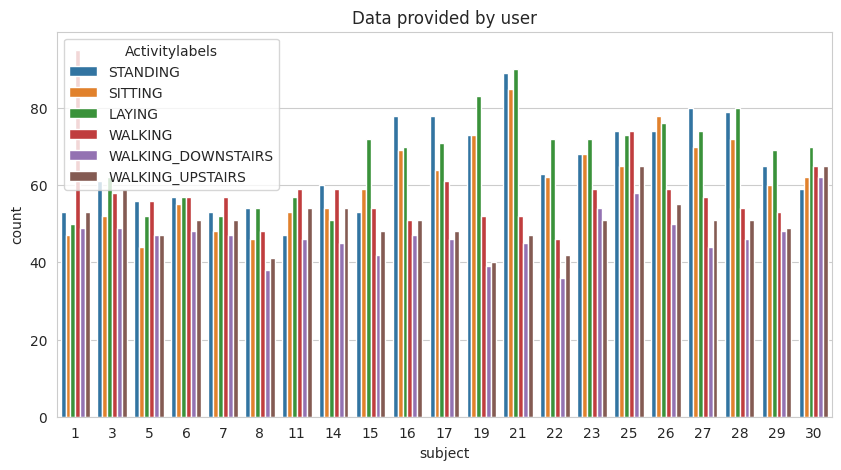

In [21]:
#checking for data imbalance
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family']='Dejavu Sans'
plt.figure(figsize=(10,5))
plt.title("Data provided by user")
sns.countplot(x="subject",hue="Activitylabels",data=train)
plt.show()

Looks like our data is balanced.Now lets check for each activity

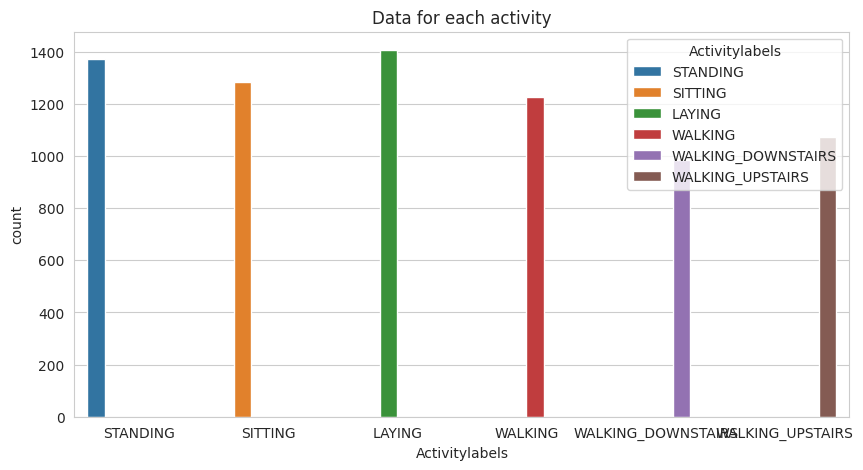

In [38]:
plt.figure(figsize=(10,5))
plt.title("Data for each activity")
sns.countplot(x="Activitylabels",hue="Activitylabels",data=train)
plt.show()

Observation-Our dataset is Balanced

Changing Feature Names

In [37]:
columns=train.columns
columns=columns.str.replace('[()]','')
columns=columns.str.replace('[-]','')
columns=columns.str.replace('[,]','')
train.columns=columns
test.columns=columns
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'Activitylabels'],
      dtype='object', length=564)

# **EDA**
1.Feature Engineering with domain knowledge

**Static and Dynamic Activity**

* In static activity motion information will not be significant(sit,laying,standing)
*  In Dynamic activity motion information will  be significant(walking, walkingup, walkingdown)












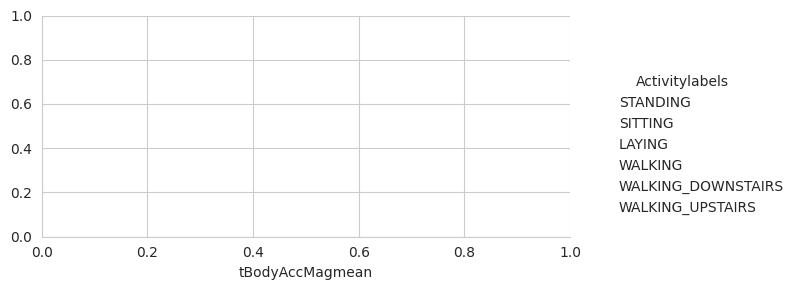

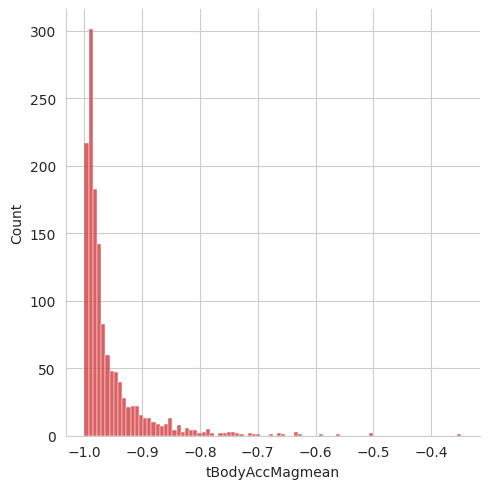

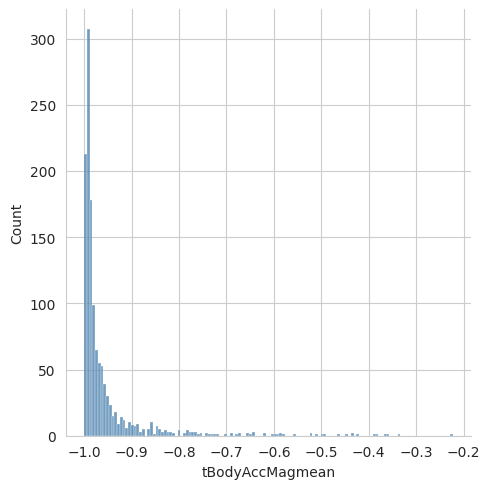

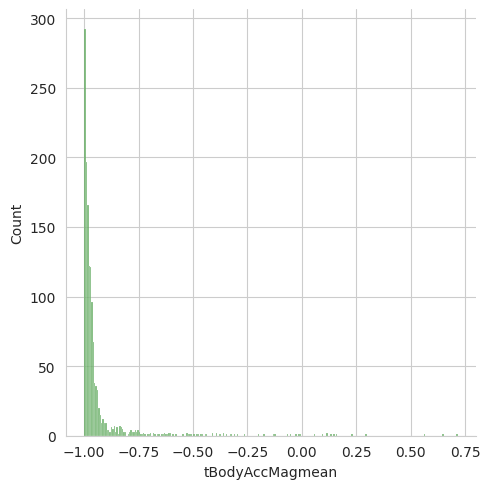

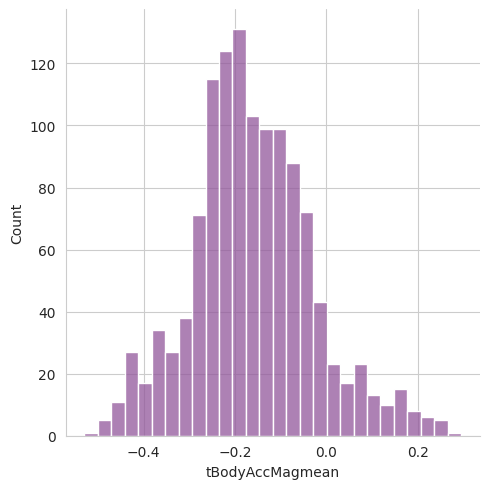

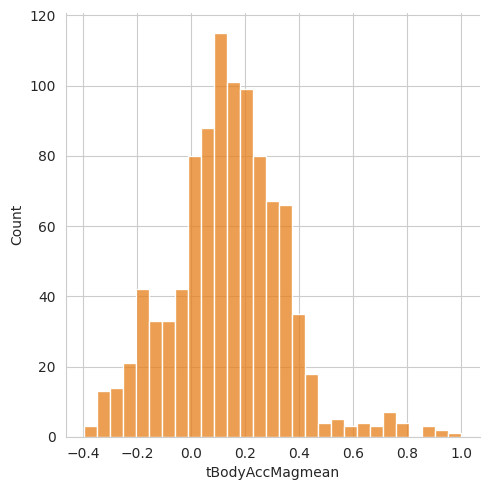

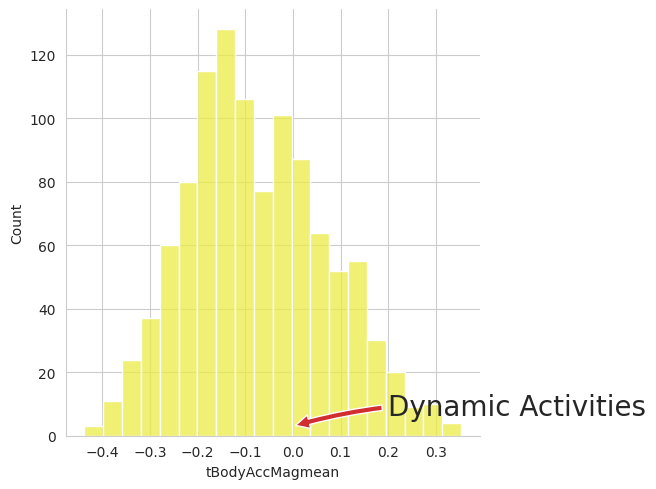

In [49]:
sns.set_palette("Set1",desat=0.80)
facetgrid=sns.FacetGrid(train,hue='Activitylabels',aspect=2)
facetgrid.map(sns.displot,'tBodyAccMagmean').add_legend()
plt.annotate("Dynamic Activities",xy=(0,3),xytext=(0.2,9),size=20,va='center',ha='left',\
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

So we can see tBodyAccMagmean varies lot for static and dynamic activites

Lets check magnitude of accelearation

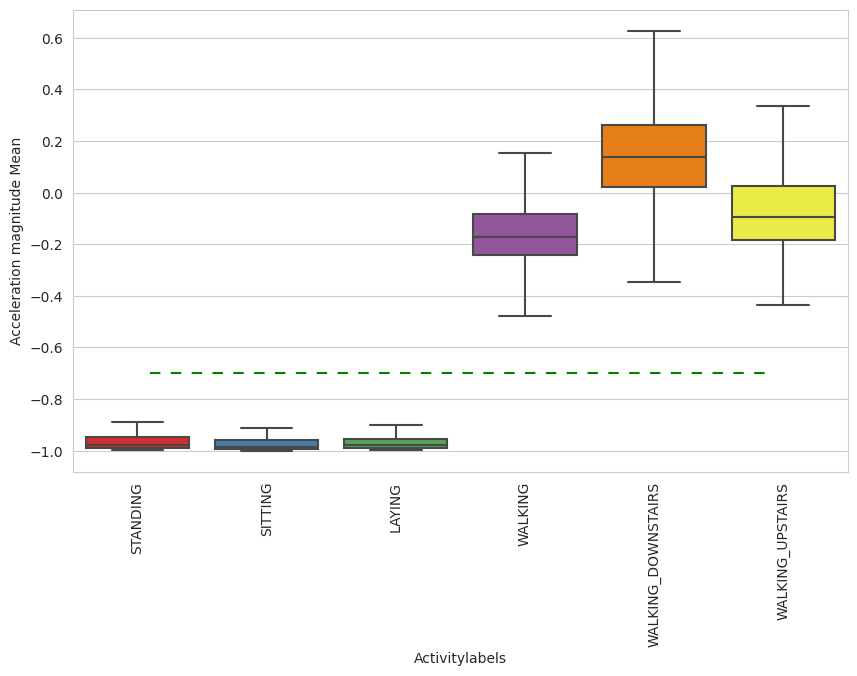

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Activitylabels",y="tBodyAccMagmean",data=train,showfliers=False,saturation=1)
plt.ylabel("Acceleration magnitude Mean")
plt.axhline(y=-0.7,xmin=0.1,xmax=0.9,dashes=(5,5),c='g')
plt.xticks(rotation=90)
plt.show()

Observations

*   If accelearation magnitude<-0.6 then it corresponds to stationary activity
*   If accelearation magnitude>-0.6 then it corresponds to Dynamic activity




Lets check gravityaccelerationX feature

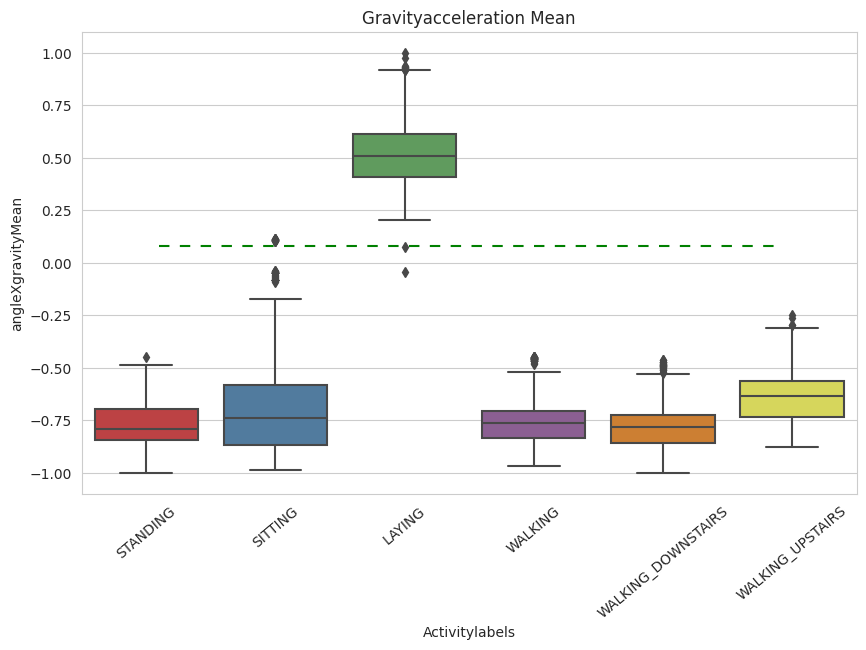

In [52]:
plt.figure(figsize=(10,6))
plt.title("Gravityacceleration Mean")
sns.boxplot(x="Activitylabels",y="angleXgravityMean",data=train)
plt.axhline(y=0.08,xmin=0.1,xmax=0.9,dashes=(5,5),c='g')
plt.xticks(rotation=40)
plt.show()

Lets check gravityaccelerationY feature

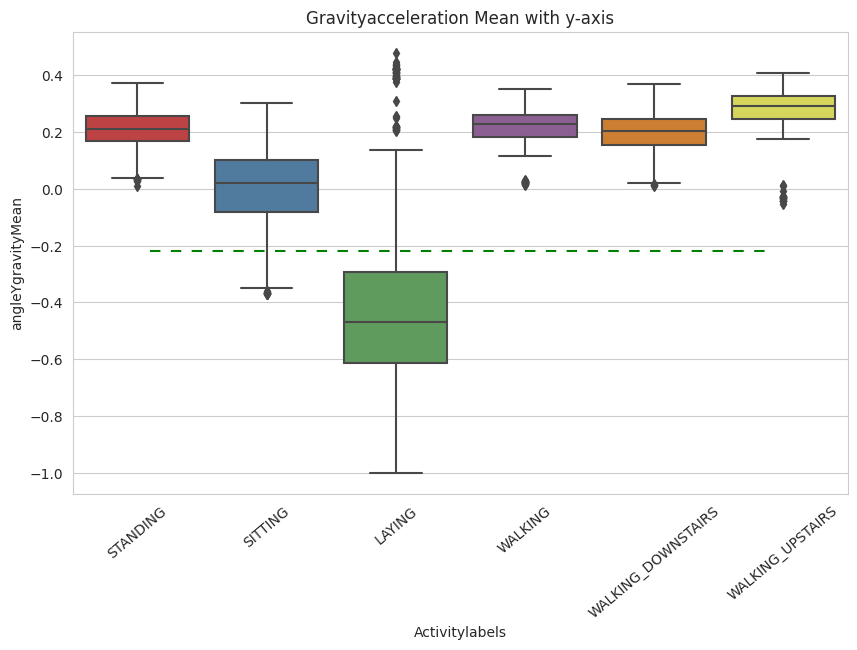

In [53]:
plt.figure(figsize=(10,6))
plt.title("Gravityacceleration Mean with y-axis")
sns.boxplot(x="Activitylabels",y="angleYgravityMean",data=train)
plt.axhline(y=-0.22,xmin=0.1,xmax=0.9,dashes=(5,5),c='g')
plt.xticks(rotation=40)
plt.show()

Observation

*   With angleYgravityMean and angleXgravityMean we can easily separate the laying activity with other activity


